In [1]:
import numpy as np
import pandas as pd
import altair as alt
import statsmodels.api as sm
# disable row limit for plotting
alt.data_transformers.disable_max_rows()
# uncomment to ensure graphics display with pdf export
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

# World Happiness Report
### Allison Kim and Jimmy Dysart

**How has healthy life expectancy, log gdp, perceptions of corruption, and happiness(life ladder) in the United States differed over time and in comparison to the world average?**

## Data Description

A short summary of the dataset we chose to work with.

The data used in this project is a part of the World Happiness Report 2023. The WHR addresses concerns for worldwide demand for emphasis on well-being and happiness as criteria for government policy. The report summarizes happiness throughout the world and how it differs quantitatively. The world Happiness Report gets its data from the Gallup World Poll. Gallup uses telephone surveys in countries where telephone coverage represents at least 80% of the population or is the customary survey methodology. In countries where telephone interviewing is employed, Gallup uses a random-digit-dial (RDD) method or a nationally representative list of phone numbers. The typical annual sample for each country is 1,000 people. If a typical country had surveys each year, the sample size over a three year period would be 3,000. The variable Life ladder asks respondents to think of a ladder with the ideal life being a 10 and the worst being a 0. Using that metric, they are asked to rate their own lives. The variable Healthy life expectancies at birth are based on the data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository (Last updated: 2020-12-04). The data at the source are available for the years 2000, 2010, 2015 and 2019. To match this report’s sample period (2005-2021), interpolation and extrapolation are used. The data is yearly data and spans from 2005 to 2023. It includes 165 unique countries along with the country averages for the 9 different metrics listed below.

* The **observational units** are _**Countries in the World**_.  
* The **variables** are _**Country Name,year,Life ladder,Log GDP per capita ,Social support ,Healthy life expectancy at birth, Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect**_. 
* One **observation** is made _**every year**_ from 2005 to 2023 for each country. 

The table below provides variable descriptions and units for each column in the dataframe.

Variable | Description | Units
---|---|---
Country Name | Name of Country | None
year | Year when data was collected | Year
Life ladder | Happiness score or subjective well-being |(0-10) 10 being extremely happy
Log GDP per capita | Log GDP per capita | USD
Social support | Average response for "Do you have a person to count on in times of need?" | 0 = No; 1 = Yes
Healthy life expectancy at birth | Average Life Expectancy | Year
Freedom to make life choices | Average response for "Are you satisfied with freedom to make life choices?" |  0 = No; 1 = Yes
Generosity | Residual Regressing national average of responses for "Have you donated in the past month?" | 0 = No; 1 = Yes
Perceptions of corruption | Average response for "Is corruption widespread throughout government/business?" | 0 = No; 1 = Yes
Positive affect | Average response for "Did you smile or laugh a lot, experience enjoyment, or learn something interesting yesterday?" | 0 = No; 1 = Yes
Negative affect | Average response for "Did you worry, feel sad, or anger yesterday?" | 0 = No; 1 = Yes

The cell below imports the data.

In [2]:
happiness_data = pd.read_csv('data/whr-2023.csv')
happiness_data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


## Question of Interest
The question of interest:"How has healthy life expectancy, log gdp, perceptions of corruption, and happiness(life ladder) in the United States differed over time and compared to the world average?" 

The motivation behind our question of interest is the technological advancements in the early 21st century and what impact they may have had on the world. The main technological advancement was the introduction of the iphone in mid 2007. The iphone completely revolutionized communication throughout the world. We want to measure the effect of these advancements on our four metrics of interest (healthy life expectancy, log gdp, perceptions of corruption, and happiness(life ladder)) throughout time.

We expect overall that, the United States might score higher on all four metrics over time and in comparison with the world average. 

Healthy life expectancy in the US likely would have increased over time due to the significant medical advancements of the 21st century. Compared to the world average, we expect HLE in the US to be higher given that the US is on the cutting edge of healthcare. 

Log GDP in the US likely would have increased over time due to the technological advancements. The US is the largest world consumer which leads us to believe that the log GDP would be higher in comparison to the world average. 

Perceptions of corruption in the US might have inreased. With the growth of business and widespread information, people have greater access to media and news of corruption is more prevalent. Compared to the world, we expect percepitons of corruption to be lower. 

Happiness in the US likely would have decreased overtime because of the negative effects of social media since the introduction of the iphone. Compared to the world, we believe that the US would be lower due to the culture in America. 

## Data Analysis

In order to begin analysis, we must first tidy the data.

### Data Tidying

Since we are only using four explanatory variables we can remove the unnecessary variable columns.

In [3]:
# remove excess columns
happiness_data1=happiness_data.drop(columns=
                    ["Social support", "Freedom to make life choices", 
                    "Generosity", "Positive affect", "Negative affect"], axis=1)
#these 5 columns are not used in analysis
happiness_data1.head()

,Country name,year,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Perceptions of corruption
0,Afghanistan,2008,3.724,7.350,50.5,0.882
1,Afghanistan,2009,4.402,7.509,50.8,0.850
2,Afghanistan,2010,4.758,7.614,51.1,0.707
3,Afghanistan,2011,3.832,7.581,51.4,0.731
4,Afghanistan,2012,3.783,7.661,51.7,0.776


Next, let's check for missingness in the data. This is important because missingness can alter or skew calculations.

In [4]:
# check for na percentages
happiness_data1.isnull().sum()/len(happiness_data1)

Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  0.009095
Healthy life expectancy at birth    0.024557
Perceptions of corruption           0.052751
dtype: float64

While there is some missing data in certain variables, it is not significant enough to take extra measure due to the fact that it is only a miniscule percentage of the data.

Since we are comparing the US to the world average, let's now calculate the world average for our four variables of interest

In [5]:
# get data set without united states so we can aggregate and find means
world_data = happiness_data1[happiness_data1['Country name']!= 'United States'] 

In [6]:
world_data1 = world_data.groupby('year').agg({'Life Ladder':'mean','Log GDP per capita':'mean',
                                'Healthy life expectancy at birth':'mean','Perceptions of corruption':'mean'})
world_data1['Country name'] = 'World'

world_data2 = world_data1[['Country name','Life Ladder','Log GDP per capita',
                           'Healthy life expectancy at birth','Perceptions of corruption']]
world_data2 = world_data2.reset_index()
world_data2 = world_data2.iloc[1:] #remove 2005 world data
world_data2.head()

,year,Country name,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Perceptions of corruption
1,2006,World,5.174341,9.044000,60.020460,0.757646
2,2007,World,5.397535,9.172670,61.510770,0.793773
3,2008,World,5.401431,9.164440,61.099206,0.765028
4,2009,World,5.442619,9.259482,62.476291,0.764282
5,2010,World,5.483252,9.394016,62.880417,0.757805


We have removed 2005 from the world data, as there is no 2005 data in the US, thus it would not make sense to compare US to the world for that year.

In [7]:
# get the US data set without the other countries
us_data = happiness_data1[happiness_data1['Country name']== 'United States']
us_data.head()

,Country name,year,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Perceptions of corruption
2071,United States,2006,7.182,10.921,66.78,0.600
2072,United States,2007,7.513,10.931,66.76,0.633
2073,United States,2008,7.280,10.923,66.74,0.668
2074,United States,2009,7.158,10.888,66.72,0.665
2075,United States,2010,7.164,10.906,66.70,0.690


In [8]:
#concat US data with world data
official_data = pd.concat([us_data,world_data2],ignore_index = True)
official_data['year'] = official_data['year'].astype(str) # change year to str
official_data

,Country name,year,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Perceptions of corruption
0,United States,2006,7.182000,10.921000,66.780000,0.600000
1,United States,2007,7.513000,10.931000,66.760000,0.633000
2,United States,2008,7.280000,10.923000,66.740000,0.668000
3,United States,2009,7.158000,10.888000,66.720000,0.665000
4,United States,2010,7.164000,10.906000,66.700000,0.690000
5,United States,2011,7.115000,10.914000,66.680000,0.697000
6,United States,2012,7.026000,10.930000,66.660000,0.710000
7,United States,2013,7.249000,10.941000,66.640000,0.747000
8,United States,2014,7.151000,10.956000,66.620000,0.702000
9,United States,2015,6.864000,10.976000,66.600000,0.698000


### Data Visualization

Now that we've separated US averages from world averages, we want to compare and contrast how these differ over time across our four variables.

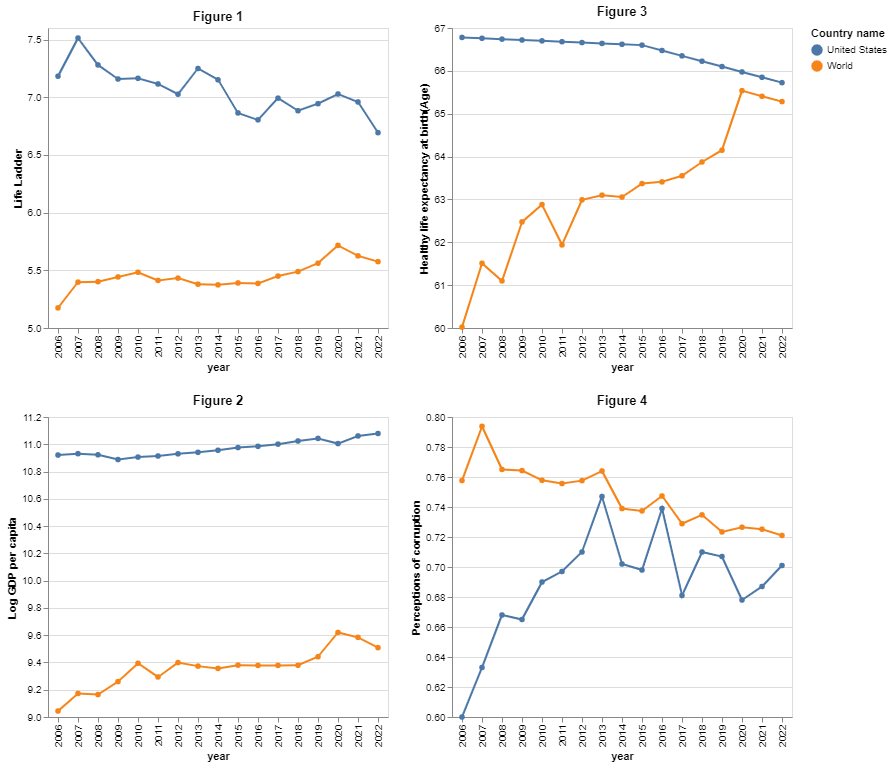

In [16]:
# Plot comparing Average happiness between US and World
fig_1 = alt.Chart(official_data, title='Figure 1').mark_line(point = True).encode(
    x = 'year',
    y = alt.Y('Life Ladder', title = 'Life Ladder', scale = alt.Scale(zero = False)),
    color = 'Country name'
)

# Plot comparing Log GDP per capita between US and World
fig_2 = alt.Chart(official_data, title='Figure 2').mark_line(point = True).encode(
    x = 'year',
    y = alt.Y('Log GDP per capita', title = 'Log GDP per capita', scale = alt.Scale(zero = False)),
    color = 'Country name'
)


# Plot comparing Healthy life expectancy at birth between US and World
fig_3 = alt.Chart(official_data, title='Figure 3').mark_line(point = True).encode(
    x = 'year',
    y = alt.Y('Healthy life expectancy at birth', title = 'Healthy life expectancy at birth(Age)', scale = alt.Scale(zero = False)),
    color = 'Country name'
)

# Plot comparing perception of corruption between US and World
fig_4 = alt.Chart(official_data, title='Figure 4').mark_line(point = True).encode(
    x = 'year',
    y = alt.Y('Perceptions of corruption', scale = alt.Scale(zero = False)),
    color = 'Country name'
)

fig_1 & fig_2 | fig_3 & fig_4

Figure 1: Across time, the US scores higher on Life Ladder in comparison to the world average. However, the US average dropped roughly a point and appears to continually decline over time while the world average is increasing.

Figure 2: Log GDP per capita in the US scores roughly 2 points higher than the world average across the 21st century. Both the US and the world average have marginally increased.

Figure 3: Compared to a minor decline of Healthy life expectancy in the US, the world HLE average increased significantly since 2006 and roughly caught up to that of the US by 2020.

Figure 4: From 2006-2013, the US perception of corruption within government and business increased by 15%. After 2013, perceptions of corruption vary each year, but are generally declining, mirroring the 21st century trend for the world average perceptions of corruption.

We found it interesting that the US Life ladder was decreasing while the world average was increasing. We want to examine whether the other three variables may be related to this observation.

Let's create a scatterplot comparing Life ladder and the other three variables using the individual yearly averages of all countries. Note that we are using the unaggregated data in this section.

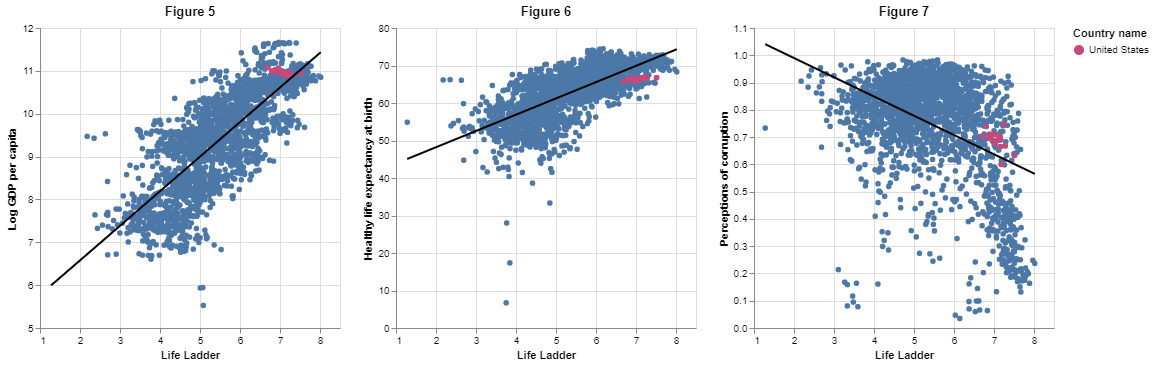

In [10]:
#scatterplot comparing different variables in the US

#Figure 5
fig_5=alt.Chart(happiness_data1, title='Figure 5').mark_circle(opacity = 1).encode(
    x = alt.X('Life Ladder', scale=alt.Scale(domain=[1, 8.5])),
    y = alt.Y('Log GDP per capita', scale=alt.Scale(domain=[5, 12])), 
).properties(
    width = 300, 
    height = 300
)

fig_5_1=alt.Chart(us_data).mark_circle(opacity = 1).encode(
    x = alt.X('Life Ladder', scale=alt.Scale(domain=[1, 8.5])),
    y = alt.Y('Log GDP per capita'), 
    color=alt.Color('Country name', scale=alt.Scale(scheme='plasma'))
).properties(
    width = 300, 
    height = 300
)

smooth_5 = fig_5.transform_regression(
    on = 'Life Ladder', 
    regression = 'Log GDP per capita'
).mark_line(color = 'black')

#Figure 6
fig_6=alt.Chart(happiness_data1, title='Figure 6').mark_circle(opacity = 1).encode(
    x = alt.X('Life Ladder', scale=alt.Scale(domain=[1, 8.5])),
    y = alt.Y('Healthy life expectancy at birth'), 
).properties(
    width = 300, 
    height = 300
)

fig_6_1=alt.Chart(us_data).mark_circle(opacity = 1).encode(
    x = alt.X('Life Ladder', scale=alt.Scale(domain=[1, 8.5])),
    y = alt.Y('Healthy life expectancy at birth'), 
    color=alt.Color('Country name', scale=alt.Scale(scheme='plasma'))
).properties(
    width = 300, 
    height = 300
)

smooth_6 = fig_6.transform_regression(
    on = 'Life Ladder', 
    regression = 'Healthy life expectancy at birth'
).mark_line(color = 'black')

#Figure 7
fig_7=alt.Chart(happiness_data1, title='Figure 7').mark_circle(opacity = 1).encode(
    x = alt.X('Life Ladder', scale=alt.Scale(domain=[1, 8.5])),
    y = alt.Y('Perceptions of corruption'), 
).properties(
    width = 300, 
    height = 300
)

fig_7_1=alt.Chart(us_data).mark_circle(opacity = 1).encode(
    x = alt.X('Life Ladder', scale=alt.Scale(domain=[1, 8.5])),
    y = alt.Y('Perceptions of corruption'), 
    color=alt.Color('Country name', scale=alt.Scale(scheme='plasma'))
).properties(
    width = 300, 
    height = 300
)

smooth_7 = fig_7.transform_regression(
    on = 'Life Ladder', 
    regression = 'Perceptions of corruption'
).mark_line(color = 'black')

fig_5 + fig_5_1 + smooth_5 | fig_6 + fig_6_1 + smooth_6 |  fig_7 + fig_7_1 + smooth_7

The US appears to have a higher Life ladder in comparison to the world. 

Figure 5: We notice a positive correlation between Life ladder and Log GDP per capita across the world in general. The US has a relatively high Log GDP per capita compared with the world.

Figure 6: Healthy Life Expectancy increases, so does Life ladder. However, there are outliers in the trend, as certain countries have an HLE as low as about 7. The US HLE falls slightly higher than the median world HLE.

Figure 7: There is a clear negative correlation between Perceptions of corruption and Life ladder. As life ladder increases, perceptions of corruption decrease steeply. The US perceptions of corruption appear slightly lower than the median world percpetions of corruption.

These relationships could possibly explain certain trends within Figure 1. For example, Life ladder increased from 2019-2020 and so did HLE. This could be caused by the positive relaitonship we observed between HLE and Life ladder. 

Before we continue to our summary of the findings, we want to further investigate the outlier in Figure 6. Let's remove the country that contains the outlier.

In [11]:
happiness_data1.sort_values('Healthy life expectancy at birth', ascending=True).head()

,Country name,year,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Perceptions of corruption
766,Haiti,2006,3.754,7.973,6.72,0.854
767,Haiti,2008,3.846,8.012,17.36,0.812
768,Haiti,2010,3.766,7.984,28.00,0.848
769,Haiti,2011,4.845,8.022,33.32,0.682
770,Haiti,2012,4.413,8.012,38.64,0.717


Now let's remove Haiti from the dataset and examine the new scatterplot

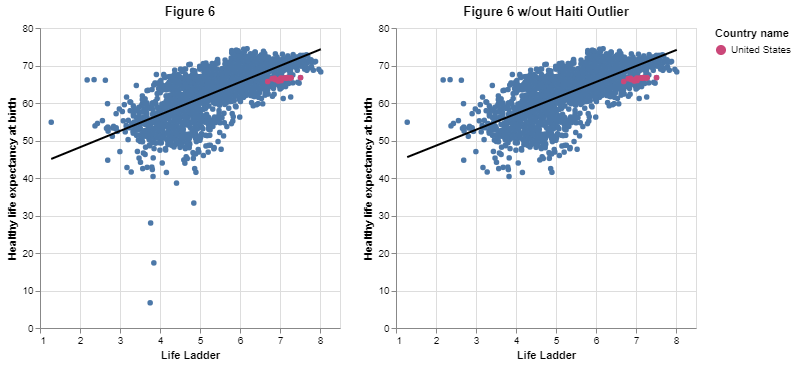

In [12]:
haiti_data = happiness_data1[happiness_data1['Country name']!= 'Haiti']

fig_8 = alt.Chart(haiti_data,title = "Figure 6 w/out Haiti Outlier").mark_circle(opacity = 1).encode(
    x = alt.X('Life Ladder', scale=alt.Scale(domain=[1, 8.5])),
    y = alt.Y('Healthy life expectancy at birth')
).properties(
    width = 300, 
    height = 300
)

fig_8_1 = alt.Chart(us_data).mark_circle(opacity = 1).encode(
    x = alt.X('Life Ladder', scale=alt.Scale(domain=[1, 8.5])),
    y = alt.Y('Healthy life expectancy at birth'),
    color = alt.Color('Country name',scale = alt.Scale(scheme = 'plasma'))
).properties(
    width = 300, 
    height = 300
)

smooth_8 = fig_8.transform_regression(
    on = 'Life Ladder', 
    regression = 'Healthy life expectancy at birth'
).mark_line(color = 'black')

smooth_6 = fig_6.transform_regression(
    on = 'Life Ladder', 
    regression = 'Healthy life expectancy at birth'
).mark_line(color = 'black')

fig_6 + fig_6_1 + smooth_6|fig_8 + fig_8_1 + smooth_8

After removing the outlier, we notice no noticeable change in the trend between Life ladder and Healthy life expectancy.

## Summary of Findings
**How has healthy life expectancy, log gdp, perceptions of corruption, and happiness(life ladder) in the United States differed over time and compared to the world average?**

**United States over time:**

Life ladder: Decreased-we interpreted this as a possible adverse effects of the introduction of technology in the 21st century. Specifically social media.

Log GDP: Increased-we interpreted this as the growth of businesses and the availability of consumerism over time because of technological advancements.

Helathy Life Expectancy: Decreased-although we initially believed that HLE would have increased, a possible reason for this could be the increase in poverty.

Perceptions of Corruption: Increased-we interpreted this as the introduction of widespread media and the accessibility of information.
    
**US compared to the world:**

Life ladder: Significantly greater from 2006-2022. We interpreted this as the US being a first world country. A potential factor could be seen in Figure 5 where the US placed highly in terms of Log GDP and Life ladder.

Log GDP: Significantly greater from 2006-2022. An obvious interpretation of this is the US being a leader in the global economy. 

Helathy Life Expectancy: A large gap initially, however, the gap is quickly closing. A potential cause could be medical and basic needs advancements throughout the world accompanied with the increasing poverty in the US.

Perceptions of Corruption: An inverse relationship over time. We interpret this as the growing public distrust in America's government and economy compared to the positive progress made by many countries around the world.